## Tissue plasma study

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
%matplotlib inline

from collections import Counter

from calzone import Calzone
import json

In [2]:
# import data table

df_regions = pd.read_csv(open("./hmcfc_methyl_v3_automatic_regions_20200512_tissue_plasma_scores.tsv","r"), 
                         header=None, sep="\t")
df_regions.head()


,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,712,713,714,715,716
0,seqname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,chr2,chr20,chr10,chr4,chr20,chr2,chr9,chr6,chr11,chr2
1,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95025841.0,5315894.0,115094131.0,8894145.0,63254375.0,104853765.0,136198706.0,98834830.0,22192790.0,26848096.0
2,end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95026250.0,5316150.0,115094306.0,8894393.0,63254911.0,104854093.0,136198933.0,98835027.0,22193270.0,26848249.0
3,n_cpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,25.0,25.0,28.0,63.0,25.0,26.0,25.0,41.0,29.0
4,name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MAL,PROKR2,ATRNL1,HMX1,FLJ16779,PANTR1,LHX3,POU3F2,ANO5,DPYSL5


In [3]:
col_meta = df_regions.iloc[0:17,:]
df_regions = df_regions.iloc[17:,:]

row_meta = df_regions.iloc[:,0:13]
row_meta.columns = col_meta.iloc[16,0:13].values
df_regions = df_regions.iloc[:,13:]

df_regions.head()

,13,14,15,16,17,18,19,20,21,22,...,707,708,709,710,711,712,713,714,715,716
17,1.3258028771369998,111.36744167950798,34.25944714995002,238.64451788465988,275.7669984444959,0.0,163.0737538878509,177.9158468888716,144.51251360793296,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,761.8193923280003,196.8459503666309,110.87153073552172,541.9654737366981,963.7782245223357,1371.5305502817855,751.5936286725905,363.76246705714203,419.2563098717852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,5.35104215409277,0.0,0.23325464110302774,1.1891204786872824,0.5945602393436412,3.5673614360618466,3.5673614360618466,0.5945602393436412,0.5945602393436412,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,450.1672263572364,341.5974835299029,107.06049227693782,549.4688204066267,1196.915213608652,1.3240212539918719,648.7704144560171,407.5261111165784,508.42416153287854,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,393.4552318841161,144.0904810337944,57.49502020536614,464.6182857824391,640.4674850849066,0.0,394.6314807088817,207.86607837331835,251.1291240874702,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
row_meta.head()

,sample_id,dataset_id,training_class_source,stage,fit_result,tumor_size_mm,t,n,m,cancer_type,pathologic_type,pathologic_sub_type,NaN
17,3184,SD-0000C51E,colorectal_tissue_cancer_stage_I_chemo_y,1.0,NaN,NaN,T2,N0,M0,Colorectal Cancer,NaN,NaN,2632.560184183399
18,67752,SD-0000C550,colorectal_tissue_cancer_stage_IV_chemo_n,NaN,NaN,70.0,NaN,NaN,NaN,Colorectal Cancer,NaN,NaN,26405.6768476895
19,67752,SD-0000C56D,colorectal_plasma_cancer_stage_IV_chemo_n,NaN,NaN,70.0,NaN,NaN,NaN,Colorectal Cancer,NaN,NaN,96.87902669728385
20,67754,SD-0000C522,colorectal_tissue_cancer_stage_IV_chemo_n,NaN,NaN,30.0,NaN,NaN,NaN,Colorectal Cancer,NaN,NaN,14596.73875264302
21,67754,SD-0000C56E,colorectal_plasma_cancer_stage_IV_chemo_n,NaN,NaN,30.0,NaN,NaN,NaN,Colorectal Cancer,NaN,NaN,9656.002077641966


In [4]:
plasma_samples = ["plasma" in x for x in row_meta["training_class_source"]]
tissue_samples = ["tissue" in x for x in row_meta["training_class_source"]]


In [9]:
pd.set_option('display.max_rows', 500)
row_meta.dataset_id[tissue_samples]


17     SD-0000C51E
18     SD-0000C550
20     SD-0000C522
22     SD-0000C53C
25     SD-0000C545
27     SD-0000C53A
28     SD-0000C51D
30     SD-0000C526
32     SD-0000C52B
35     SD-0000C55B
36     SD-0000C54E
39     SD-0000C553
41     SD-0000C54A
42     SD-0000C537
45     SD-0000C557
47     SD-0000C528
49     SD-0000C521
50     SD-0000C540
53     SD-0000C55E
55     SD-0000C51C
56     SD-0000C520
58     SD-0000C527
60     SD-0000C51F
62     SD-0000C529
63     SD-0000C542
64     SD-0000C54F
65     SD-0000C54B
66     SD-0000C544
67     SD-0000C523
68     SD-0000C536
69     SD-0000C539
70     SD-0000C55D
71     SD-0000C55F
72     SD-0000C533
73     SD-0000C52F
74     SD-0000C563
75     SD-0000C560
76     SD-0000C524
77     SD-0000C549
78     SD-0000C534
79     SD-0000C535
80     SD-0000C548
81     SD-0000C54D
82     SD-0000C562
83     SD-0000C554
84     SD-0000C52D
85     SD-0000C53B
86     SD-0000C547
87     SD-0000C52A
88     SD-0000C556
89     SD-0000C552
90     SD-0000C531
91     SD-00

In [6]:
col_meta = col_meta.set_index(0)
col_meta = col_meta.iloc[:,12:]

In [7]:
col_meta
regions = col_meta.loc["seqname",:] + ":" + col_meta.loc["start",:] + ":" + col_meta.loc["end",:]
df_regions.columns = regions

In [8]:
model_regions = [n>0 for n in col_meta.loc["n_folds_used",:].astype(float)]


In [9]:
df_model_regions = df_regions.loc[:,model_regions]

In [10]:
df_plasma = df_model_regions[plasma_samples]
df_plasma_sample_meta = row_meta[plasma_samples]
df_plasma.index = df_plasma_sample_meta["sample_id"]
df_plasma = df_plasma.fillna(0).astype(float)

df_tissue = df_model_regions[tissue_samples]
df_tissue_sample_meta = row_meta[tissue_samples]
df_tissue.index = df_tissue_sample_meta["sample_id"]
df_tissue = df_tissue.fillna(0).astype(float)

print(df_plasma.shape)
print(df_tissue.shape)

(24, 117)
(72, 117)


In [ ]:
#get secondary ids 
metadata = Calzone.get_dataset_metadata_with_ids(df_tissue_sample_meta["dataset_id"])

sec_ids = [d.raw_sample_metadata['lims_sample']['secondary_id'] for d in metadata]

sid_to_sec_id = dict(zip(df_tissue_sample_meta["sample_id"],sec_ids))

secid_to_dsid = dict(zip(sec_ids,list(df_tissue_sample_meta["dataset_id"])))

print(df_tissue_sample_meta.head())
print( metadata)


In [13]:
df_table.head()

,well,secondary_id,histological type,CRC Stage,Sub-Stage,row,colum,Grade,pTNM T,pTNM N,...,pTNM L,pTNM V,radicality,localization,L/R sided,neoadjuvant therapies,neoadjuvant chemotherapies,neoadjuvant radiations,neoadjuvant hormone therapies,neoadjuvant targeted therapies
0,A1,B2629,adenocarcinoma - partially mucinous,II,IIA,A,1,G3,pT3,pN0,...,L0,V0,R0,ileocaecal,R,n,n,n,n,n
1,A2,R1731,adenocarcinoma,II,IIA,A,2,G2,pT3,pN0,...,L0,V0,R0,ileocaecal,R,n,n,n,n,n
2,A3,B2747,adenocarcinoma,IV,IVA,A,3,G2,pT4a,pN1a,...,L1,V0,R2,sigmoid colon,L,n,n,n,n,n
3,A4,R1506,mucinous adenocarcinoma,IV,IVB,A,4,G2,pT3,pN2b,...,L1,V0,R2,left flexure,L,n,n,n,n,n
4,A5,A5514,mucinous adenocarcinoma,IV,IVC,A,5,G1,pT4a,pN0,...,L1,V0,R2,ileocaecal,R,n,n,n,n,n


In [14]:
# read in metadata table

df_table = pd.read_csv(open("./Methyl_158_tumor_S4fc_manifest_annotated.csv","r"))
df_table.head()

sec_id_to_stage = dict(zip(df_table["secondary_id"],df_table["CRC Stage"]))

lesion_loc_dict = {"ascending colon":"proximal",
                   "Cecum":"proximal",
                   "right flexure":"proximal",
                   "ileocaecal":"proximal",
                   "appendix":"distal",
                   "rectum":"rectal",
                   "sigmoid colon":"distal",
                   "transverse colon":"proximal",
                   "Descending colon (left)":"distal",
                   "left flexure":"proximal",
                   None:"None"}

sec_id_to_loc = dict(zip(df_table["secondary_id"],[lesion_loc_dict[l] for l in df_table["localization"]]))

sec_id_to_muc = dict(zip(df_table["secondary_id"], []))

In [44]:
sec_id_to_sid = dict( [(x[1],int(x[0])) for x in sid_to_sec_id.items()])

df_table["sid"] = [sec_id_to_sid[sec] for sec in df_table["secondary_id"]]

df_table["dsid"] = [secid_to_dsid[secid] for secid in df_table["secondary_id"]]
df_table.head()


,well,secondary_id,histological type,CRC Stage,Sub-Stage,row,colum,Grade,pTNM T,pTNM N,...,radicality,localization,L/R sided,neoadjuvant therapies,neoadjuvant chemotherapies,neoadjuvant radiations,neoadjuvant hormone therapies,neoadjuvant targeted therapies,sid,dsid
0,A1,B2629,adenocarcinoma - partially mucinous,II,IIA,A,1,G3,pT3,pN0,...,R0,ileocaecal,R,n,n,n,n,n,67805,SD-0000C55F
1,A2,R1731,adenocarcinoma,II,IIA,A,2,G2,pT3,pN0,...,R0,ileocaecal,R,n,n,n,n,n,67827,SD-0000C554
2,A3,B2747,adenocarcinoma,IV,IVA,A,3,G2,pT4a,pN1a,...,R2,sigmoid colon,L,n,n,n,n,n,67779,SD-0000C520
3,A4,R1506,mucinous adenocarcinoma,IV,IVB,A,4,G2,pT3,pN2b,...,R2,left flexure,L,n,n,n,n,n,67765,SD-0000C526
4,A5,A5514,mucinous adenocarcinoma,IV,IVC,A,5,G1,pT4a,pN0,...,R2,ileocaecal,R,n,n,n,n,n,67752,SD-0000C550


In [45]:
with open("./Methyl_tumor_plasma_metadata_dsid.csv","w") as fout:
    df_table.to_csv(fout, index=False)

In [17]:
Counter(df_table["histological type"])

Counter({'adenocarcinoma - partially mucinous': 4,
         'adenocarcinoma': 49,
         'mucinous adenocarcinoma': 18,
         'medullary carcinoma': 1})

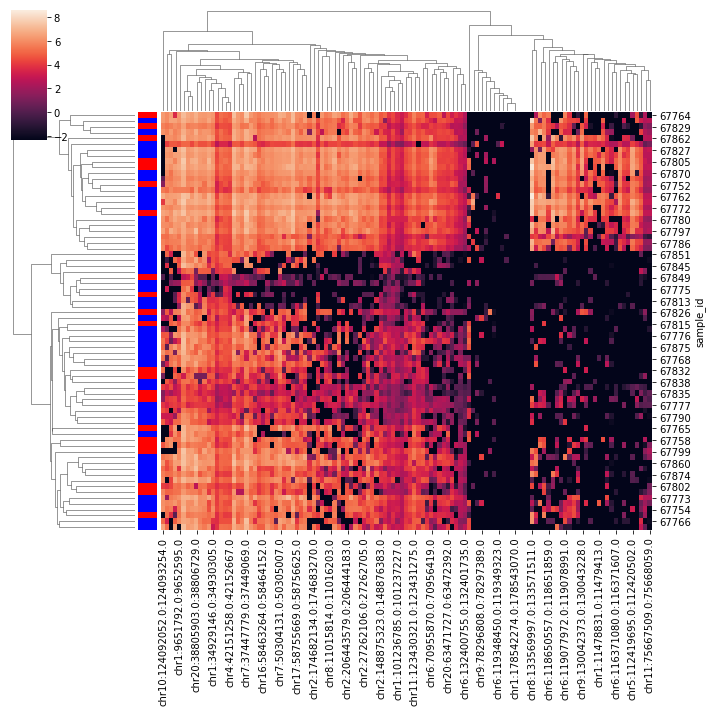

In [22]:
#df_tissue_sample_meta["tumor_size_mm"] = df_tissue_sample_meta["tumor_size_mm"].fillna(0).astype(float)
#cm = matplotlib.cm.get_cmap('Set2')
#norm = matplotlib.colors.Normalize(vmin=0,vmax=8)
#colors = [cm(norm(x),bytes=False) for x in range(8)]
#norm = matplotlib.colors.Normalize(vmin=14, vmax=123)
#colors = [cm(norm(x),bytes=False) for x in df_tissue_sample_meta["tumor_size_mm"].values]

stage_color_dict = {"I":"blue","II":"green","III":"orange","IV":"red"}

sec_ids = [sid_to_secid[int(sid)] for sid in df_tissue.index]

stages = [sec_id_to_stage[sec_id] for sec_id in sec_ids]
stage_colors = [stage_color_dict[stage] for stage in stages]

locs = [sec_id_to_loc[sec_id] for sec_id in sec_ids]
loc_colors = ["red" if loc=="proximal" else "yellow" for loc in locs]

sec_id_to_mtype = dict(zip(df_table["secondary_id"], df_table["histological type"]))
mtypes = [sec_id_to_mtype[sec_id] for sec_id in sec_ids]
muc = ["red" if x == "mucinous adenocarcinoma" or x=="adenocarcinoma - partially mucinous" else "blue" for x in mtypes]
sns.clustermap(np.log(df_tissue + 0.1),
              row_colors=[muc])


In [25]:
# heatmap for paired samples only
paired_samples = [sid in df_plasma_sample_meta["sample_id"].values for sid in df_tissue_sample_meta["sample_id"].values]
paired_samples = df_tissue_sample_meta["sample_id"][paired_samples].values

In [26]:
paired_samples

array(['67752', '67754', '67758', '67760', '67762', '67764', '67765',
       '67766', '67768', '67769', '67770', '67771', '67772', '67773',
       '67774', '67775', '67776', '67777', '67778', '67779', '67780',
       '67781', '67919', '67923'], dtype=object)

(24, 117)


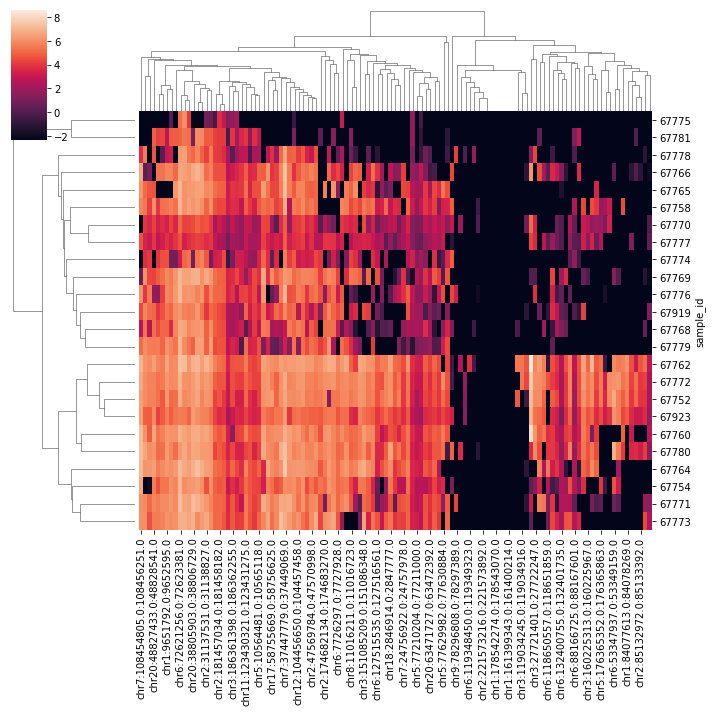

In [27]:
# heatmap of paired tissue samples
df_tissue_paired = df_tissue.loc[paired_samples,:]
print(df_tissue_paired.shape)

cm = sns.clustermap(np.log(df_tissue_paired +0.1))



In [28]:
col_order = np.array(df_tissue_paired.columns)[cm.dendrogram_col.reordered_ind]
row_order = np.array(df_tissue_paired.index)[cm.dendrogram_row.reordered_ind]

(24, 117)


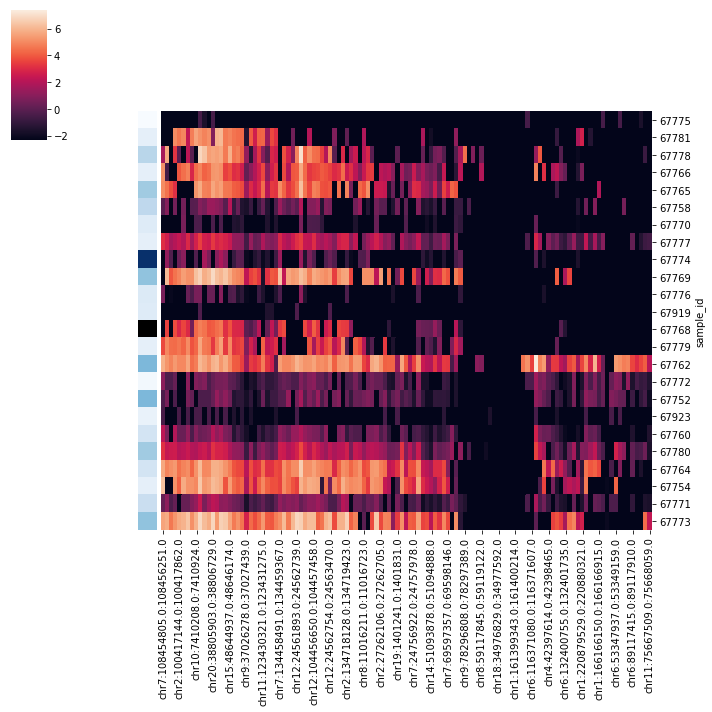

In [29]:
df_plasma_paired = df_plasma.loc[paired_samples,:]
print(df_plasma_paired.shape)
df_plasma_paired_sort = df_plasma_paired.loc[row_order,col_order]

cm = matplotlib.cm.get_cmap('Blues')
norm = matplotlib.colors.Normalize(vmin=20, vmax=130)
tum_dict = dict(zip(df_plasma_sample_meta["sample_id"].values,df_plasma_sample_meta["tumor_size_mm"].astype(float)))

colors = [cm(norm(tum_dict[sid]),bytes=False) for sid in df_plasma_paired_sort.index]


cm = sns.clustermap(np.log(df_plasma_paired_sort +0.1),
                   row_cluster=False, col_cluster=False,
                   row_colors=colors)

## Correlation between region scores in paired samples

In [31]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

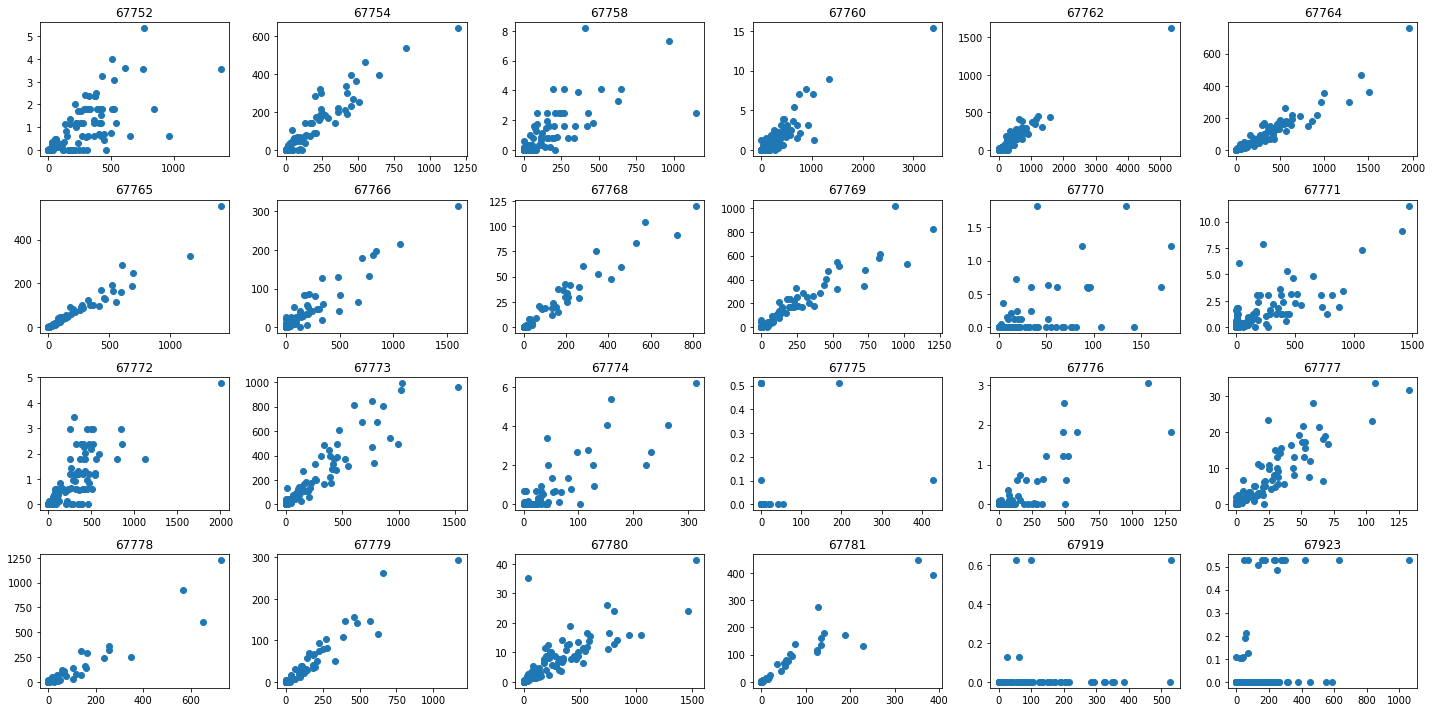

In [43]:
df_tissue_paired_sort = df_tissue_paired.loc[row_order,col_order]

plt.subplots(nrows=4,ncols=6, figsize=(20,10))
for i, s in enumerate(paired_samples, start=1):
    plt.subplot(4,6,i)
    plt.scatter(df_tissue_paired_sort.loc[s,:], df_plasma_paired_sort.loc[s,:])
    plt.title(f"{s}")
plt.tight_layout()

In [44]:
from scipy.stats import spearmanr

In [63]:
# for each region calculate the correlation between tissue and plasma values across samples
#hmcfc_methyl_v3_automatic_regions_20200512/v1
# per_cpg_hmcfc_min_3_cpg_dense -v 1

correlations = {}
for reg in df_tissue_paired_sort.columns:
    corr, p = spearmanr(df_tissue_paired_sort[reg].values, df_plasma_paired_sort[reg].values)
    n_plasma_samples = len([x for x in df_plasma_paired_sort[reg] if x > 0])
    correlations[reg]=(corr, p, n_plasma_samples)


/home/billiegould/.virtualenvs/pineapple-env/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/billiegould/.virtualenvs/pineapple-env/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/billiegould/.virtualenvs/pineapple-env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/billiegould/.virtualenvs/pineapple-env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/billiegould/.virtualenvs/pineapple-env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


/home/billiegould/.virtualenvs/pineapple-env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/billiegould/.virtualenvs/pineapple-env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'number of regions')

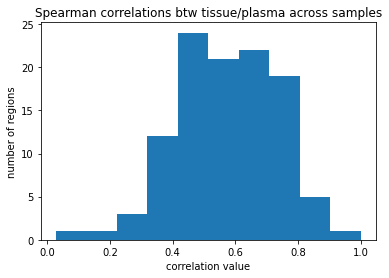

In [50]:
plt.figure()
plt.title("Spearman correlations btw tissue/plasma across samples")
plt.hist([i[0] for i in correlations.values()])
plt.xlabel("correlation value")
plt.ylabel("number of regions")

(array([17.,  2.,  5., 14.,  5., 14., 18., 22., 11.,  9.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

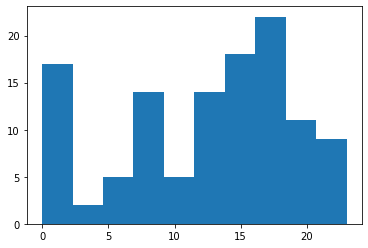

In [65]:
plt.hist([x[2] for x in correlations.values()])

In [66]:
df_corr = pd.DataFrame(correlations).T
df_corr.head()
df_corr = df_corr.reset_index()
df_corr.head()
df_corr[["Chrom","Start","End"]] = df_corr["index"].str.split(":", expand=True)
df_corr.head()
df_corr.columns = ["index","tissue/plasma correlation", "p-value", "n_plasma_samples", "Chrom", "Start","End"]
df_corr = df_corr[["Chrom","Start","End","tissue/plasma correlation","p-value", "n_plasma_samples"]]

In [67]:
df_corr_signif = df_corr[df_corr["p-value"] <=0.00043] #bonferroni
df_corr_signif = df_corr_signif[df_corr_signif["n_plasma_samples"]>=6].sort_values("p-value", ascending=True)
df_corr_signif.head()

,Chrom,Start,End,tissue/plasma correlation,p-value,n_plasma_samples
103,chr8,38467679.0,38468778.0,0.856496,9.286563e-08,9.0
89,chr8,133569997.0,133571511.0,0.832811,4.437526e-07,13.0
92,chr4,42397614.0,42398465.0,0.815866,1.180020e-06,7.0
93,chr6,118650557.0,118651859.0,0.810729,1.556783e-06,9.0
116,chr11,75667509.0,75668059.0,0.805166,2.082390e-06,8.0


In [68]:
with open("v3_regions_ranked_by_tissue_plasma_correlation.txt","w") as fout:
    df_corr_signif.to_csv(fout, index=False)

## 

In [ ]:
# What is the overlap between the CpG dense panel and the TCGA 450 array?